# 2장 머신러닝 프로젝트 처음부터 끝까지

* 주택 가격을 예측하는 회귀 작업을 살펴보면서 선형 회귀, 결정 트리, 랜덤 포레스트 등 여러 알고리즘 학습

<div align="center"><img src="images/homl02-01d.png" width="600"></div>

## 2.1 실제 데이터로 작업하기

* 유명한 공개 데이터 저장소
    * UC 얼바인Irvine 머신러닝 저장소(http://archive.ics.uci.edu/ml)
    * 캐글Kaggle 데이터셋(http://www.kaggle.com/datasets)
    * 아마존 AWS 데이터셋(https://registry.opendata.aws)
* 메타 포털(공개 데이터 저장소가 나열)
    * 데이터 포털Data Portals(http://dataportals.org)
    * 오픈 데이터 모니터Open Data Monitor(http://opendatamonitor.eu)
    * 퀀들Quandl(http://quandl.com)
* 인기 있는 공개 데이터 저장소가 나열되어 있는 다른 페이지
    * 위키백과 머신러닝 데이터셋 목록(https://goo.gl/SJHN2k)
    * Quora.com(https://homl.info/10)
    * 데이터셋 서브레딧subreddit(http://www.reddit.com/r/datasets)

## 2.2 큰 그림 보기

* 실제 데이터로 작업하는 예제 따라하기
* 주어진 데이터: 미국 캘리포니아 인구조사 데이터
    * 특성: 구역(block)별 인구, 중간 소득, 경도, 위도 등
    * 레이블: 중간 주택 가격
* 목표: 캘리포니아 주택가격 모델 구현

### 문제 정의

* 지도 학습(supervised learning): 조사된 주택 가격 레이블을 활용한 훈련
* 회귀(regression): 중간 주택 가격 예측
  * 다중 회귀(multiple regression): 여러 특성을 활용한 예측
  * 단변량 회귀(univariate regression): 구역마다 하나의 가격만 예측
* 배치 학습(batch learning): 빠르게 변하는 데이터에 적응할 필요가 없음

<p>
<table cellspacing="20">
<tr>
<td>
<img src="images/homl02-02.png">
</td>
<td>
<img src="images/homl02-03.jpg">
</td>
</tr>
</table>
</p>

## 2.3 데이터 구하기

### 작업환경 만들기

* 추천: 구글 코랩, mybinder, Deepnote, Docker 등 활용
* 직접 개발환경 설정하기는 교재 2.3.1절 참조

### 데이터 다운로드

* StaLib 저장소에 있는 데이터 활용
* 저자가 교육 목적으로 범주형 특성 추가 및 몇 개 특성 제외
* 저자가 지정한 곳으로부터 파이썬 함수를 이용하여 직접 다운로드 가능. 교재 및 주피터 노트북 참조.

### 데이터 구조 훑어보기

#### pandas의 데이터프레임 활용

* `head()`, `info()`, `describe()`, `hist()` 등을 사용하여 데이터 구조 훑어보기

#### `head()` 메서드 활용 결과

<div align="center"><img src="images/homl02-05.png" width="600"></div>

#### `info()` 메서드 활용 결과

1. 총 **샘플링 개수**: 20,640
    * 캘리포니아를 20,640구역으로 나위어 조사한 인구조사
    * 구역 크기:8 600 ~ 3,000명
2. 구역별로 경도, 위도, 중간 주택 연도, 해안 근접도 등 총 10개의 조사 항목
3. '해안 근접도'는 범주형 데이터이고 나머지는 수치형 데이터.
4. '방의 총 개수'의 경우 누락된 데이터인 207개의 null 값 존재

#### 범주형 데이터 탐색

* '해안 근접도'는 5개의 범주로 구분
    * <1H OCEAN**: 해안에서 1시간 이내
    * INLAND: 내륙
    * NEAR OCEAN: 해안 근처
    * NEAR BAY: Bay Area라 불리는 샌프란시스코 도시 중심 지역
    * ISLAND: 섬  

### 테스트 세트 만들기

* 모델 학습 시작 전 준비된 데이터 셋을 훈련 셋과 테스트 셋으로 나누어야 함

* 테스트 세트에 포함된 데이터는 미리 분석하지 말 것.
  * 미리 분석 시 **데이터 스누핑 편향**을 범할 가능성이 높아짐
  * 미리 보면서 알아낸 직관이 학습 모델 설정에 영향을 미칠 수 있음 
  * 테스트 세트 크기: 전체 데이터 셋의 20%

* 훈련 셋과 데이터 셋을 구분하는 방식에 따라 결과가 조금씩 달라짐 
    * 무작위 샘플링 vs. 계층적 샘플링

* 여기서는 계층적 샘플링을 사용해 훈련 세트와 테스트 세트를 분류하여 모델 학습에 사용

#### 계층적 샘플링

* 계층: 동질 그룹

* 테스트 세트 전체 계층을 대표하도록 각 계층별로 적절하게 샘플을 추출해야함
  * 계층 기준 예제: 소득

* 소득의 범주를 지정해야 하며, 각 계층별로 충분한 크기의 샘플이 포함되어야함
  * 학습 과정에서 편향이 발생하지 않도록 하기 위해
  * 특정 소득 구간에 포함된 샘플이 과하게 적거나 많으면 해당 계층의 중요도가 과대 혹은 과소 평가될 것

* 전체 데이터셋의 중간 소득 히스토그램 확인

<div align="center"><img src="images/homl02-08.png" width="500"></div>

* 대부분 구역의 중간 소득이 **1.5~6.0**(15,000~60,000$) 사이

* 소득 구간을 아래 숫자를 기준으로 5개로 구분

    ```
    [0, 1.5, 3.0, 4.6, 6.0, np,inf]
    ```

#### 계층 샘플링과 무작위 샘플링 비교

<div align="center"><img src="images/homl02-07.png" width="500"></div>

## 2.4 데이터 이해를 위한 탐색과 시각화

* 테스트 세트를 제외한 훈련 세트에 대해서만 시각화를 이용하여 탐색

### 지리적 데이터 시각화

* 구역이 집결된 지역과 그렇지 않은 지역의 구분을 명확하게 표현할 수 있음.

* 샌프란시스코의 베이 에어리어, LA, 샌디에고 등 밀집된 지역 확인 가능

<div align="center"><img src="images/homl02-09.png" width="500"></div>

* 주택 가격이 해안 근접도, 인구 밀도와 관련이 큼
* 해안 근접도: 위치에 따라 다르게 작용
  * 대도시 근처: 해안 근처 주택 가격이 상대적 높음
  * 북부 캘리포니아 지역: 높지 않음

<div align="center"><img src="images/homl02-11.png" width="500"></div>

### 상관관계 조사

* 중간 주택 가격 특성과 다른 특성 사이의 상관관계: 상관계수 활용

<div align="center"><img src="images/homl02-12.png" width="600"></div>

#### 상관계수의 특징

* 상관계수: $[-1, 1]$ 구간의 값
* 1에 가까울 수록: 강한 양의 선형 상관관계
* -1에 가까울 수록: 강한 음의 선형 상관관계
* 0에 가까울 수록: 매우 약한 선형 상관관계

<div align="center"><img src="images/homl02-14.png" width="500"></div>

#### 주의사항
* 상관계수가 0에 가까울 때: 선형 관계가 거의 없다는 의미이지, 아무런 관계가 없다는 의미는 아님
* 상관계수는 기울기와 아무 연관 없음

#### 상관계수를 통해 확인할 수 있는 정보

* 중간 주택 가격과 중간 소득의 상관계수가 0.68로 가장 높음
    * 중간 소득이 올라가면 중간 주택 가격도 상승하는 경향이 있음

* 산점도 활용
    * 점들이 너무 넓게 퍼져 있음. 완벽한 선형관계와 거리 멂.
    * 50만 달러 수평선: 가격 제한
        * 35만, 28만, 그 아래 정도에서도 수평선 존재
        * 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋음.

<div align="center"><img src="images/homl02-13.png" width="500"></div>

### 특성 조합 실험

* 구역별 방의 총 개수와 침실의 총 개수 대신 아래 특성이 보다 유용함
    * '가구당 방 수'(rooms for household)
    * '방 하나당 침실 수'(bedrooms for room)
    * '가구당 인원'(population per household)

* 특성별 상관계수 다시 확인
  * 중간 주택 가격과 방 하나당 침실 개수: -0.26
  * 방 하나당 침실 개수가 적을 수록 주택 가격이 상승하는 경향이 있음
   

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

### 데이터 전치리와 변환 파이프라인

* 데이터 전처리(data preprocessing): 모델 학습을 효율적으로 진행하기 위해 주어진 데이터를 변환시키는 것
*  수치형 데이터와 범주형 데이터에 대해 다른 변환과정을 사용
* 수치형 데이터 전처리 과정
  * 데이터 정제
  * 조합 특성 추가
  * 특성 스케일링
* 범주형 데이터 전처리 과정
  * 원-핫-인코딩(one-hot-encoding)

* 수치형 데이터 전처리 과정에 사용된 세 가지 변환과정은 파이프라인을 이용하여 자동화
* 이후 원-핫-인코딩 변화과정으로 변환된 범주형 데이터와 결합하면서 전처리 과정이 완료됨

### 사이킷런 API 활용

* 변환과정 중에서 '조합 특성 추가' 과정을 제외한 나머지 과정은 사이킷런에서 제공하는 관련 API를 활용
* '조합 특성 추가' 과정도 다른 사이킷런 API와 호환이 되는 방식으로 사용자가 직접 구현하는 방법을 설명

* 사이킷런에서 제공하는 API는 일관되고 단순한 인터페이스를 제공
* 이 성질을 이용하여 '조합 특성 추가' 과정을 지원하는 API를 구현하면 사이킷런의 다른 API와 자동으로 호환

#### 일관성

* 모든 사이킷런의 API는 일관되고 단순한 인터페이스를 제공
* 대표적인 API는 세 가지
  * 추정기(estimator)
    * 데이터셋을 기반으로 특정 모델 파라미터들을 추정하는 클래스의 객체이며, fit() 메서드가 이 기능을 수행
    * fit()메서드의 리턴값: 생성된 모델 파라미터를 인스턴스 속성으로 갖는 self
      * 특정 속성이 업데이트된 객체 자신이 리턴값
  * 변환기(transformer):
    * 데이터셋을 변환하는 추정기이며, transform()이 이 기능을 수행
      * 변환기는 fit()과 transform() 모두 포함되어 있어야 함
    * fit() 메서드에 의해 학습된 파라미터를 이용하여 데이터셋을 변환한다.
    * 모든 변화기는 fit() 메서드와 transform() 메서드를 연속해서 호출하는 fit_transform() 메서드를 함께 제공
  * 예측기(predictor): 데이터셋의 특정 특성에 대한 예측을 하는 추정기
    * 주어진 데이터셋과 관련된 값을 예측하는 기능을 제공하는 추정기이며, predict() 메서드가 이 기능을 수행
      * fit()과 predict() 메서드가 포함되어 있어야 함
    * predict() 메서드가 추정한 값의 성능을 측정하는 score() 메서드도 포함
    * 일부 예측기는 추정치의 신뢰도를 평가하는 기능도 제공

### 수치형 데이터 전치러 과정 1: 데이터 정제
* 누락된 특성값이 있으면 해당 값 또는 특성을 먼저 처리하고 모델 학습을 진행

* `total_bedrooms` 특성에 207개 구역에 대한 값이 null로 채워져 있음, 즉, 일부 구역에 대한 정보가 누락됨.

* null 값 처리 방법
  * 해당 구역 제거
  * 전체 특성 삭제
  * 특정 값으로 채우기
    * 0, 평균값, 중앙값 등
    * 책에서는 중앙값으로 채움.

### 텍스트와 범주형 특성 다루기: 원-핫 인코딩

* 범주형 입력 특성인 해안 근접도(ocean_proximity)를 수치형 데이터로 변환

<div align="center"><img src="images/homl02-15.png" width="600"></div>

#### 단순 수치화의 문제점
  * 해안 근접도는 단순히 구분을 위해 사용
  * 해안에 근접하고 있다 해서 주택 가격이 기본적으로 더 비싼 것은 아니라는 의미
  * 반면에 수치화된 값들은 크기를 비교할 수 있는 숫자
  * 따라서 모델 학습 과정에서 숫자들의 크기 때문에 잘못된 학습이 이루어질 수 있다.

#### 원-핫 인코딩(one-hot encoding)

* 수치화된 범주들 사이의 크기 비교를 피하기 위해 더미(dummy) 특성을 추가하여 활용
* 생성되는 더미 특성은 사용된 범주를 사용

* 예를 들어, 해안 근접도 특성 대신에 다섯 개의 범주 전부를 새로운 특성으로 추가 -> 각각의 특성값을 아래와 같이 정함
  * 해당 카테고리의 특성값: 1
  * 나머지 카테고리의 특성값: 0

<div align="center"><img src="images/homl02-16.png" width="600"></div>

### 수치형 데이터 전처리 과정 2: 조합 특성 추가

* 특성 추가를 위해 변환기 클래스를 __직접 정의__
* 앞서 살펴본 다음 세 가지 특성을 자동으로 추가하는 변환기 클래스를 정의
  * 가구당 방 개수(rooms for household)
  * 방 하나당 침실 개수(bedrooms for room)
  * 가구당 인원(population per household)

* 변환기 클래스를 선언하기 위해서는 fit() 메서드와 transform() 메서드만 정의하면 됨

* 주의: fit() 메서드의 리턴값은 self

#### CombinedAttributesAdder 변환기 클래스 선언
* **__init__() 메서드**: 방 하나당 침실 개수 속성을 추가할지 여부를 확인
* **fit() 메서드**: 계산해야 하는 파라미터가 없음
  * 아무 일도 할 필요 없이 **바로 self를 리턴**
* **transform() 메서드**: 넘파이 어레이를 입력받아 **속성을 추가한 어레이**를 반환

```python
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        ...

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        ...
```

### 수치형 데이터 전처리 과정 3: 특성 스케일링

* 머신러닝 알고리즘은 입력 데이터셋의 특성값들의 스케일(범위)이 다르면 제대로 작동하지 않음
* 특성에 따라 다루는 숫자의 크기가 다를 때 통일된 스케일링이 필요
* __주의__: 타깃(레이블)에 대한 스케일링은 하지 않음

#### **min-max 스케일링**
* **정규화**(normalization)라고도 불림

* 특성값 $x$를 **$\frac{x-min}{max-min}$**로 변환

* 변환 결과: **0에서 1** 사이
* 이상치에 매우 민감
  * 이상치가 매우 **크면 분모가 매우 커져서** 변환된 값이 **0 근처**에 몰림

#### **표준화(standardization)**
* 특성값 $x$ 를 **$\frac{x-\mu}{\sigma}$**로 변환
  * $\mu$: 특성값들의 **평균**값
  * $\sigma$: 특성값들의 **표준편차**

* 결과: 변환된 데이터들이 **표준정규분포**를 이룸
  * 이상치에 상대적으로 영향을 덜 받음.

#### 주의사항

* 모든 변환기의 fit() 메서드는 훈련 데이터에 대해서만 적용
* transform() 메서드는 모든 데이터에 대해 적용 
  * 훈련 세트를 이용하여 필요한 파라미터를 확인한 후 그 값들을 이용하여 전체 데이터셋트를 변환
  * 예를 들어, 따로 떼어놓은 테스트 데이터들은 훈련 데이터를 이용하여 확인된 값들을 이용하여 특성 스케일링을 진행

### 변환 파이프라인

* 모든 전처리 단계를 정확한 순서대로 연속적으로 진행되어야 함
* 사이킷런의 Pipeline 클래스가 이 기능을 지원

* 수치형 데이터 전처리 과정을 파이프라인으로 묶은 방법

#### `pipeline` 클래스 활용

```python
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
```

* Pipeline의 인스턴스 생성에 필요한 인자는 추정기의 이름과 추정기의 쌍으로 이루어진 튜플들의 리스트
* 마지막 추정기를 제외하면 모두 변환기 즉, fit_transform() 메서드를 포함하고 있어야 함

* 생성된 파이프라인 객체의 fit() 메서드를 호출하면, 마지막 단계 이전까지는 해당 변환기의 fit_transform() 메소드가 연속해서 호출되며, 최종적으로 마지막 추정기의 fit() 메서드가 호출

#### ColumnTransformer 클래스

* 사이킷런의 `ColumnTransformer` 클래스를 이용하여 특성별로 지정된 전처리를 처리할 수 있도록 지정 가능

    * 수치형 특성: `num_pipeline` 변환기
    * 범주형 특성: `OneHotEncoder` 변환기

```python
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
```

## 2.6 모델 선택과 훈련

* 전처리 후 두 요소를 결정해야함
  * 학습 모델
  * 회귀 모델 성능 측정 지표

* 목표: 구역별 중간 주택 가격 예측 모델
* 학습 모델: 회귀 모델
* 회귀 모델 성능 측정 지표: 평균 제곱근 오차(RMSE)

### 회귀 모델 성능 측정 지표

#### 평균 제곱근 오차(root mean square error, RMSE): 

* RMSE는 유클리디안 노름 또는 $\ell_2$ 노름으로도 불림

$$
\text{RMSE}(\mathbf X, h) 
= \sqrt{\frac 1 m \sum_{i=0}^{m-1} (h(\mathbf x^{(i)}) - y^{(i)})^2}
$$

* $\mathbf X$: (평가대상) 데이터셋 전체 샘플들의 특성값들로 구성된 행렬, 레이블(타겟) 제외
    * $m$: 데이터셋 $\mathbf X$의 크기
    * $\mathbf x^{(i)}$: $i$ 번째 샘플의 전체 특성값 벡터. 레이블(타겟) 제외
    * $y^{(i)}$: $i$ 번째 샘플의 레이블
    * $h$: 예측 함수
    * $\hat y^{(i)} = h(\mathbf x^{(i)})$: $i$번째 샘플에 대한 예측 값

* __주의__
    * 인덱스 $i$가 책에서와는 달리 0부터 시작함.
    * 이유는 파이썬 넘파이 어레이, 데이터프레임에 사용되는 인덱스 개념과 통일시키기 위해서임.

#### 평균 절대 오차(mean absolute error, MAE): 

* MAE는 맨해튼 노름 또는 $\ell_1$ 노름으로도 불림

* 이상치가 많은 경우 활용

$$
\text{MAE}(\mathbf X, h) 
= \frac 1 m \sum_{i=0}^{m-1} \mid h(\mathbf x^{(i)}) - y^{(i)} \mid
$$

### 훈련 세트에서 훈련하고 평가하기

* 지금까지 한 일
    * 훈련 세트와 테스트 세트로 분류
    * 머신러닝 알고리즘에 주입할 데이터를 자동으로 정제하고 준비하기 위해 변환 파이프라인 작성
* 이제 할 일
    * 모델 선택 후 훈련시키기
    * 예제: 선형 회귀, 결정트리 회귀

#### 선형 회귀 모델(4장)

* 사이킷런의 선형 회귀 모델은 **`LinearRegression`** 예측기 클래스가 제공

* 훈련:

```python
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
```

* 예측

```python
lin_reg.predict(housing_prepared))
```

#### 결정트리 회귀 모델(6장)

* 결정 트리 모델은 데이터에서 복잡한 비선형 관계를 학습할 때 사용
* 사이킷런의 **`DecisionTreeRegressor`** 예측기가 결정 트리 회귀 모델을 생성

* 훈련:

```python
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
```

* 예측:

```python
housing_predictions = tree_reg.predict(housing_prepared)
```

### 교차 검증을 사용한 평가

#### k-겹 교차 검증

* 훈련 세트를 __폴드__(fold)라 불리는 k-개의 부분 집합으로 무작위로 분할
* 총 k 번 지정된 모델을 훈련
    * 훈련할 때마다 매번 다른 하나의 폴드를 평가에 사용
    * 다른 (k-1) 개의 폴드를 이용해 훈련
* 최종적으로 k 번의 평가 결과가 담긴 배열 생성

#### 예제: 결정 트리 모델 교차 검증

* k = 10으로 설정

```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
```

* __주의__

    * 효용함수: k-겹 교차 검증의 모델 학습 과정에서 성능을 측정할 때 높을 수록 좋은 효용함수 활용

    * RMSE의 음숫값을 이용하여 훈련되는 모델 평가
        * `scoring="neg_mean_squared_error"`

    * 교차 검증 결과 평가를 위해 다시 음숫값(`-scores`)을 사용해야 함.


#### 예제: 선형 회귀 모델 교차 검증

* k = 10으로 설정

```python
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
```

### 앙상블 학습(7장)

* 여러 다른 모델을 모아서 하나의 모델을 만드는 기법
* 즉, 교차 검증을 일반화 시킨 모델 학습법임.
* 머신러닝 알고리즘의 성능을 극대화는 방법 중 하나

* 앙상블 학습 예제: 랜덤 포레스트
    * 특성을 무작위로 선택해서 많은 결정 트리를 만들고 그 예측을 평균 내는 모델
    * 사이킷런의 `RandomForestRegressor` 사용법은 기본적으로 동일함.

* 훈련

```python
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
```

* 예측

```python
housing_predictions = forest_reg.predict(housing_prepared)
```

## 2.7 모델 세부 튜닝

* 살펴 본 모델 중에서 **랜덤 포레스트** 모델의 성능이 가장 좋았음
* 가능성이 높은 모델을 선정한 후에 **모델 세부 설정을 튜닝**해야함
* 튜닝을 위한 세 가지 방식
  * **그리드 탐색**
  * **랜덤 탐색**
  * **앙상블 방법**

## 8.1 그리드 탐색
* **가장 만족할 만한 하이퍼파라미터 조합을 찾을 때까지** **수동**으로 시도하는 것은 매우 비효율적이며 시간이 오래 걸림
* 사이킷런의 **GridSearchCV**는 **지정된 조건 내에서 최적의 하이퍼파라미터 조합을 시도**하면서 각각의 조합에 대해 **교차 검증**을 실행하여 해당 조합을 활용한 모델의 성능을 평가

* 예를 들어, 아래 코드는 **랜덤 포레스트 모델에 대한 최적 조합**을 찾아줌

* **param_grid** 변수
  * 랜던 포레스트 **변환기**를 생성할 때 사용되는 **옵션 변수값들의 후보**를 담은 사전 값들의 리스트
  * 리스트 첫째 항목: 총 3x4 = 12 가지의 조합을 실행
    * **n_estimators** 옵션 변수값 후보 3개
    * **max_features** 옵션 변수값 후보 4개
  * 리스트 둘째 항목: 총 1x2x3 = 6 가지의 조합을 실행
    * **bootstrap=False** 옵션 변수값 후보 1개
    * **n_estimators** 옵션 변수값 후보 2개
    * **max_features** 옵션 변수값 후보 3개
  * 총 조합 경우의 수: 12 + 6 = 18가지
* **cv=5**
  * **5-겹 교차 검증** 실행
  * 총 5x18 = 90번 훈련

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

* 최상의 파라미터 조합은 **best_parsms_**인스턴스 속성에 저장

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

* **8과 30**은 각 옵션 변수가 취할 수 있었던 **최댓값**
* 따라서 **숫자를 좀 더 키워서** 그리드 탐색을 시도
  * 숫자를 키우면 좀 오래 걸림

```
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 50, 100], 'max_features': [8, 10, 12]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
```



* **최적의 조합**을 갖춘 **랜덤 포레스트** 추정기는 **best_estimator_** 인스턴스 속성에 저장

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

* 그리드 탐색 **결과 전체**를 확인하려면 **cv_results_** 인스턴스 속성에 저장된 값들을 확인하면 됨
  * **cv_results_**는 모든 조합을 이용한 **교차 검증 결과**를 사전 자료형으로 기록
  * 예를 들어, 각 조합 별로 **평균 제곱 오차**와 **조합 내용**은 **mean_test_score와 params** 지정자를 이용

* **!참고!**
  * 랜덤 포레스트는 **결정 트리 모델**을 이용
  * 비용을 **크게** 하는 방향으로 학습
  * 따라서 **평균 제곱근 오차**를 확인하려면 **부호를 변경한 뒤**에 제곱근 값을 계산

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

* `max_features=8`과 `n_estimators=30`일 때 RMSE가 49,682 정도
  * 랜덤 포레스트 교차 검증을 기본으로 실행했을 때의 RMSE인 50,182 보다 조금 더 좋음

* **cv_results**를 **데이터프레임**으로 변환하면 보다 **쉽게 내용** 확인 가능

In [ ]:
cvresDF = pd.DataFrame(grid_search.cv_results_)
cvresDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076034,0.003029,0.004437,0.000133,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,-4.196408e+09,-3.903319e+09,-4.184325e+09,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.241481,0.004937,0.011911,0.000226,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,-3.130196e+09,-2.865188e+09,-3.173856e+09,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.726396,0.007167,0.034936,0.000887,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,-2.948330e+09,-2.619995e+09,-2.970968e+09,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.124774,0.006038,0.004584,0.000099,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,-3.734515e+09,-3.418747e+09,-3.913907e+09,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.397409,0.002995,0.012818,0.000073,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,-2.892276e+09,-2.616813e+09,-2.948207e+09,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,1.184312,0.003788,0.035424,0.000140,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,-2.666426e+09,-2.398071e+09,-2.649316e+09,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.163131,0.003786,0.004563,0.000038,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,-3.592772e+09,-3.328934e+09,-3.579607e+09,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.547390,0.006560,0.012824,0.000052,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,-2.762720e+09,-2.521134e+09,-2.907667e+09,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.651508,0.010412,0.035748,0.000641,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,-2.607703e+09,-2.350953e+09,-2.661059e+09,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.209101,0.003064,0.004581,0.000206,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,-3.402843e+09,-3.129307e+09,-3.510047e+09,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


* 총 18 가지 조합을 확인하였기 때문에 생성된 데이터프레임의 **행의 수가 18**

In [ ]:
list(cvresDF)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_max_features',
 'param_n_estimators',
 'param_bootstrap',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

* 각 조합에 대해 **23가지** 정보를 기록

In [ ]:
len(list(cvresDF))

23

#### 그리드 탐색과 파이프라인
* 데이터 **전처리**와 **그리드 탐색을 연결한 파이프라인**을 이용하면 전처리 단계에서 설정해야 하는 값들을 **하이퍼파라미터**로 다룰 수 있음
* 예를 들어 아래 내용에 대해 어떻게 설정하는 것이 좋은지도 함께 찾아줌
  * `CombinedAttributesAdder` 클래스의 객체를 생성할 때 지정하는 `add_bedrooms_per_room` 옵션 변수 값 지정하기
  * **이상치** 처리하기
  * **누락**된 값 처리하기
  * **특성** 선택하기


## 8.2 랜덤 탐색
* **그리드 탐색**은 **적은 수의 조합**을 실험해볼 때 유용
* 조합의 수가 커지거나, 설정된 탐색 공간이 커지면 **랜덤 탐색**이 효율적
  * 설정값이 **연속적인 값**을 다루는 경우 랜덤 탐색이 유용

* 사이킷런의 `RandomizedSearchCV` 추정기가 랜덤 탐색을 지원

* 랜덤 탐색이 총 10회 진행될 때마다 n_estimators와 max_features 값이 **무작위로 지정된 구간에서 선택**
* 랜덤 포레스트 학습이 10x5=50번 이루어짐



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

* **param_distribs** 변수
  * 랜덤 포레스트 변환기를 생성할 때 사용되는 옵션 변수값들의 후보를 **무작위로 선택**해주는 확률분포 함수 지정
    * **n_estimators**: 1에서 200 사이의 숫자를 임의로 선택해주는 randint 함수 사용
    * **max_features**: 1에서 8사이의 숫자를 임의로 선택해주는 randint 함수 사용
* **cv=5** 옵션 변수: 5-겹 교차 검증 실행.
* **n_iter=10** 옵션 변수: 랜덤 탐색 10회 진행

* 최상의 파라미터 조합은 **best_parsms_** 인스턴스 속성에 저장

In [ ]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

* 최상의 조합은 **max_features=7와n_estimators=180**
* 각 조합 별로 평균 제곱 오차와 조합 내용은 **mean_test_score와 params** 지정자를 이용

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


## 8.3 `RandomizedSearchCV`를 위한 Scipy 분포 함수
* 랜덤 탐색을 하려면 특정 옵션 변수갈들을 무작위로 선택해주는 **확률분포함수**를 지정
* 랜덤 탐색을 이용하여 캘리포니아 인구조사 데이터셋 분석을 위한 최상의 랜덤 포레스트 모델을 찾았을 때 사용한 옵션 변수와 확률분포는 아래와 같음
  * **'n_estimators': randint(low=1, high=200)**
  * **'max_features': randint(low=1, high=8)**

* 기타 확률분포는 Scipy 패키지의 **stats 모듈**에 정의
* 그 중에서 기하분포 **geom**, 지수분포 **expon**, 균등분포 **uniform**, 정규분포 **norm** 등을 이용하여 **무작위로 생성된 샘플들의 분포**를 히스토그램으로 보여줌

**!참고!**
* 히스토그램의 y축은 도수를 가리킴
* 도수를 **10,00으로 나눈 값**으로 대체하면 히스토그램에서 해당 확률분포의 그래프가 그려지게 됨
* 확률밀도함수의 그래프로 감싸인 영역이 표시



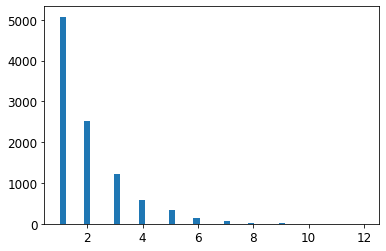

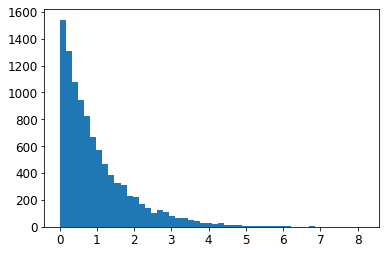

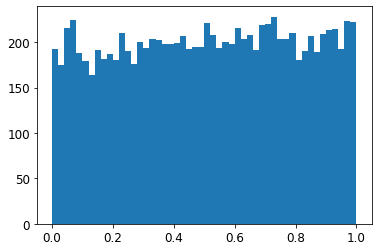

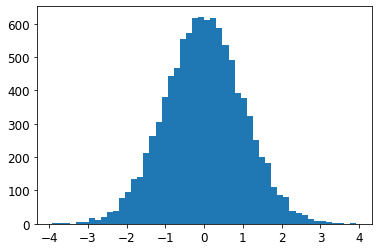

In [ ]:
from scipy.stats import geom, expon, norm, uniform

# 기하분포
geom_distrib=geom(0.5).rvs(10000, random_state=42)
# 지수분포
expon_distrib=expon().rvs(10000, random_state=42)
# 균등분포
uniform_distrib=uniform().rvs(10000)
# 정규분포
norm_distrib=norm().rvs(size=10000, random_state=42)

# 발생할 확률이 0.5인 사건이 몇 번 시도하면 발생하는가를 10,000번 실험한 결과
plt.hist(geom_distrib, bins=50)
plt.show()
# 특정 사건이 발생할 때까지 걸리는 시간을 10,000번 실험한 결과
plt.hist(expon_distrib, bins=50)
plt.show()
# 0과 1사의 실수를 임의로, 하지만 균등하게 10,000번 선택한 결과
plt.hist(uniform_distrib, bins=50)
plt.show()
# 무작위로 10,000개의 숫자를 선택한 결과. 단, 표준정규분포를 따라야 함. 
plt.hist(norm_distrib, bins=50)
plt.show()

## 8.4 앙상블 방법
* 결정 트리 모델 하나보다 **랜덤 포레스트와 결정 트리 모델을 함께 사용**하면 보다 좋은 성능을 얻을 수 있음
* **최고 성능을 보이는 개별 모델을 조합**하면 보다 좋은 성능을 얻을 수 있음
* 특히, 각각의 모델이 **많이 다른 종류의 오차를 만들 때** 더욱 효과를 볼 수 있음

## 8.5 최상의 모델과 오차 분석
* 그리드 탐색과 랜덤 탐색 등을 통해 얻어진 **최상의 모델을 분석**해서 문제에 대한 좋은 통창을 얻을 수 있음

* 예를 들어, 앞서 그리드 탐색을 통해 얻어진 최상의 **랜덤 포레스트 모델**에서 사용된 특성들 각각의 **중요도**를 **feature_importances_** 인스턴스 속성에 저장되어 있다.

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

* 중요도와 특성 **이름**을 함께 표시

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # 예전 방식
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

* 위 정보를 특성들의 중요도를 확인할 수 있으며, **중요 특성과 그렇지 않은 특성**을 구분할 수 있음
* 예를 들어, **중간 소득**(median income)과 **INLAND**(내륙, 해안 근접도)가 가장 중요한 특성으로 확인됨
* 하지만 **해안 근접도**의 다른 네 가지 특성은 별로 중요하지 않음

* 이것을 이용해 **특성을 추가하거나 삭제**하고, **이상치를 제거**하는 등의 방식을 이용하여 **좋은 성능의 학습 모델**을 생성

## 8.6 테스트 셋으로 최상의 모델 평가하기
1. **최상의 모델 확인**

In [ ]:
final_model = grid_search.best_estimator_

2. **테스트 세트 전처리**
  * 과정은 **훈련 세트의 경우와 동일**
  * **full_pipeline** 변환기의 **transform() **메서드를 직접 활용
  * **fit()** 메서드는 전혀 **사용하지 않는 것**에 주의
  * 훈련 세트의 전처리에서는 **fit_transform()** 메서드를 사용하였음

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

3. **최상의 모델을 이용하여 예측하기**

In [ ]:
final_predictions = final_model.predict(X_test_prepared)

4. **예측 결과의 오차 계산**

In [ ]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47730.22690385927

* 테스트 셋에 대한 **평균 제곱근 오차**가 이전에 교차 검증을 통해 얻은 결과보다 좋음
* 하지만 이것이 **그리드 탐색** 통해 다양한 **하이퍼파라미터 조합**을 실험하여 얻은 결과가 **항상 좋다라는 결론을 의미 X**
* 일반적으론 **반대의 결과**가 나오기 때문
* 따라서 테스트 세트에 대한 **성능을 높이기** 위해 하이퍼파라미터를 **일부러 튜닝하는 것은 피해야함** 
  * 일부러 튜닝할 경우 **과대적합된 모델**을 얻게될 가능성이 높아지기 때문

#### 평균 제곱근 오차의 t-분포 신뢰구간 확인하기
* 테스트 세트에 대한 RMSE를 어느 정도 믿을 수 있을지 **t-분포 95% 신뢰 구간**을 계산
* scipy 패키지의 **`stats`** 모듈을 활용

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

* 결과에 따르면 임의의 캘리포니아 구역에 대해 예측된 중간 주택 가격과 실제 중간 주택 가격의 차이는 **95%의 확률로 45,685달러에서 49,691 달러** 정도로 확인됨

#### 수동으로 t-분포 신뢰구간 계산하기


In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45685.10470776, 49691.25001877858)

* t-점수 대신 z-점수를 사용 가능

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45685.717918136455, 49690.68623889413)